In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from random import choice
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from IPython import display
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

np.set_printoptions(formatter={'float': '{:.5f}'.format})
print(sklearn.__version__)
from scipy import stats
from sklearn import datasets
import matplotlib.image as mpimg
import time
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser
from astropy.io import fits
from astropy.utils.data import download_file

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.19.1


In [7]:
from astropy.table import Table
import pyfits as fits
import numpy as np

from sklearn import metrics

from os.path import expanduser
home = expanduser("~")
imgs = 500
test_imgs = 420

# Path to the downloaded files
# download_path=home+'/Desktop/' # To be adjusted on your machine
download_path='//Volumes/CJSTORFER/' # To be adjusted on your machine



# Path to export the data
export_path=home+'/Desktop/'   # To be adjusted on your machine

# Loads the catalog
cat = Table.read(download_path+'GroundBasedTraining/classifications.csv')
cat= cat[imgs:imgs+test_imgs]


In [6]:
ims = np.zeros((test_imgs, 4, 101, 101))
counter = 0
# print ims.shape
# Loads the images
for i, id in enumerate(cat['ID']):
    if (i%10 == 0):
        counter +=1
        print str(counter)+"0 done."
    for j, b in enumerate(['R', 'I', 'G', 'U']):
        ims[i, j] = fits.getdata(download_path+'GroundBasedTraining/Public/Band'+str(j+1)+'/imageSDSS_'+b+'-'+str(id)+'.fits')

        
# Concatenate images to catalog
cat['image'] = ims


# Export catalog as HDF5
cat.write(export_path+'catalogs_test_'+str(test_imgs)+'.hdf5', path='/ground', append=True)

print "Done !"


10 done.
20 done.
30 done.


KeyboardInterrupt: 

In [8]:
from astropy.table import Table

# Loads the table created in the previous section
d = Table.read(export_path+'catalogs_test_'+str(test_imgs)+'.hdf5', path='/ground')  # Path to be adjusted on your machine

In [9]:
# We use the full set for training,
# as we can test on the independent challenge testing set
x = array(d['image']).reshape((-1,4,101,101))
print x.shape

y = array(d['is_lens']).reshape((-1,1))
print y.shape

(420, 4, 101, 101)
(420, 1)


In [10]:
# Clipping and scaling parameters applied to the data as preprocessing
vmin=-1e-9
vmax=1e-9
scale=100

mask = where(x == 100)

x[mask] = 0

# Simple clipping and rescaling the images
x = np.clip(x, vmin, vmax)/vmax * scale

x[mask] = 0

In [11]:
from deeplens.resnet_classifier import deeplens_classifier

Using Theano backend.


In [ ]:
model = deeplens_classifier()

model.load('/Users/Chris/CMUDeepLens/Trained_Sets/deeplens_params_003.npy', x, y)

loading from /Users/Chris/CMUDeepLens/Trained_Sets/deeplens_params_003.npy...


In [12]:
purity, completeness = model.eval_purity_completeness(x,y)

In [34]:
print y.reshape(-1,).reshape(-1,1).shape
print x.shape

(420, 1)
(420, 4, 101, 101)


In [35]:
tpr,fpr,th = model.eval_ROC(x,y)

In [37]:
print tpr.shape
print fpr.shape
print th.shape

(1000,)
(1000,)
(1000,)


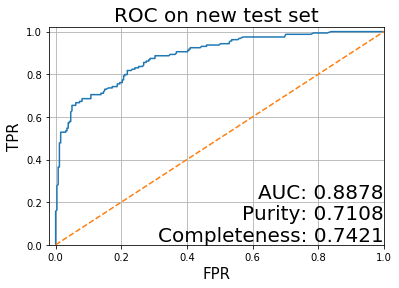

In [45]:
roc_auc = metrics.auc(fpr, tpr)
title('ROC on new test set', fontsize=20)
plot(fpr,tpr)
xlabel('FPR', fontsize=15); ylabel('TPR', fontsize=15)
xlim(0,1); ylim(0,1.)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.text(1, 0.2, 'AUC: ' + str("%.4f" % roc_auc),
        verticalalignment='bottom', horizontalalignment='right', fontsize=20)
plt.text(1, 0.1, 'Purity: ' + str("%.4f" % purity),
        verticalalignment='bottom', horizontalalignment='right', fontsize=20)
plt.text(1, 0, 'Completeness: ' + str("%.4f" % completeness),
        verticalalignment='bottom', horizontalalignment='right', fontsize=20)
grid(True)
grid(True)
plt.show()